# SUPERVISED MACHINE LEARNING (LINEAR REGRESSION) 
## Author-Neeraj Lalwani

### Importing important libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset

In [2]:
Data = pd.read_csv("marks.csv")
print("Data is successfully imported")

Data is successfully imported


#### First 7 records

In [3]:
Data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


#### Last 7 records

In [4]:
Data.tail(7)

,Hours,Scores
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


##### Using describe() function to see count, mean, std, minimum, percentiles & maximum.


In [5]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Using info() function get information about the data

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualizing Data.

#### Ploting box plot

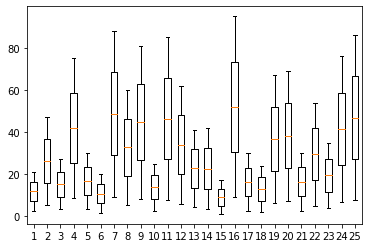

In [7]:
plt.boxplot(Data)
plt.show()

#### Ploting scatter plot


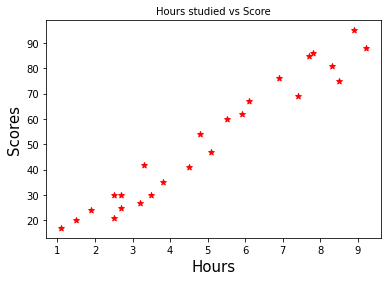

In [8]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(Data.Hours,Data.Scores,color='red',marker='*')
plt.show()

### The plots show positive linear relation between 'Hours' and 'Scores'

In [9]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values

### Preparing data and splitting into train and test sets.

#### We are splitting our data using 80:20 rule(Pareto principle)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [11]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)


X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


## Training the model.

In [12]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

### Fitting Training data

In [13]:
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [14]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = 2.018160041434662 
B1 = [9.91065648]


#### B0 = Intercept & Slope = B1

### Plotting the regression line

In [15]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

### Plotting training data

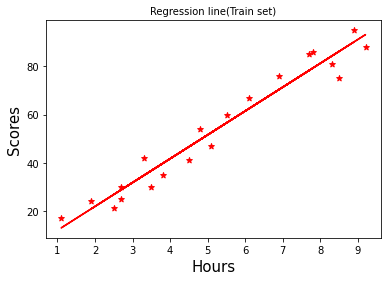

In [16]:
plt.scatter(X_train,Y_train,color='red',marker='*')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

### Test data

In [17]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Plotting test data

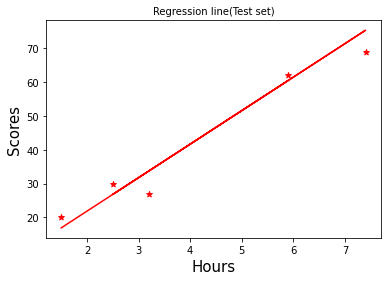

In [18]:
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='red',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

### Comparing actual vs predicted scores

In [19]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## ACCURACY OF THE MODEL

### Goodness of fit test

In [20]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

#### Above 94% indicates that above model is a good fit

### Predicting the Error

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


## Predicting the score for 9.25 hours

In [22]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


## CONCLUSION: From the result we can see that if a student studies for 9.25 hours a day he will sercure marks in the neighbourhood of 93.69%